In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Data/monthly-beer-production-in-austr.csv', index_col='Month', parse_dates=['Month'])
data.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [3]:
data.tail()

,Monthly beer production
Month,
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0
1995-07-01,119.0
1995-08-01,153.0


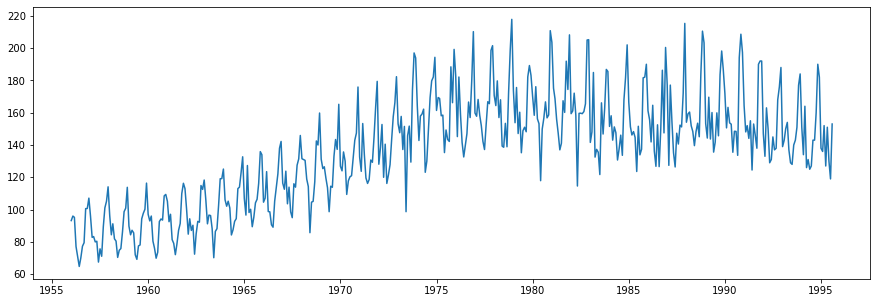

In [4]:
# visualize the data
import matplotlib.pyplot as plt
fig, axis = plt.subplots(figsize=(15,5))
axis.plot(data)

In [5]:
# test for the stationarity of the data
# 1. using the rolling test

data['Moving Average'] = data['Monthly beer production'].rolling(window=12).mean()
data['Standard deviation'] = data['Monthly beer production'].rolling(window=12).std()
data.head(15)

,Monthly beer production,Moving Average,Standard deviation
Month,,,
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,NaN,NaN
1956-03-01,95.2,NaN,NaN
1956-04-01,77.1,NaN,NaN
1956-05-01,70.9,NaN,NaN
1956-06-01,64.8,NaN,NaN
1956-07-01,70.1,NaN,NaN
1956-08-01,77.3,NaN,NaN
1956-09-01,79.5,NaN,NaN


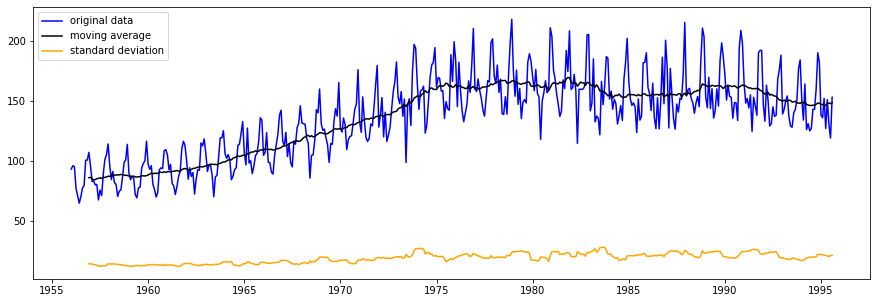

In [6]:
# plot the movin average together with the rolling standard deviation

figure, axis = plt.subplots(figsize=(15, 5))
axis.plot(data['Monthly beer production'], color='blue', label='original data')
axis.plot(data['Moving Average'], color='black', label='moving average')
axis.plot(data['Standard deviation'], color='orange', label='standard deviation')
plt.legend()

In [7]:
# ffrom the visualization the data is not stationary
# we can move a step higher to compute the adfuller test on the data to test for stationarity

test = adfuller(data['Monthly beer production'], autolag='AIC')

responses = pd.Series(test[0:4], index=['Test statistics', 'p-value', 'lags used', 'number of information used'])

for key, value in test[4].items():
    responses['critical value %s'%key] = value

responses

Test statistics                -2.282661
p-value                         0.177621
lags used                      17.000000
number of information used    458.000000
critical value 1%              -3.444709
critical value 5%              -2.867871
critical value 10%             -2.570142
dtype: float64

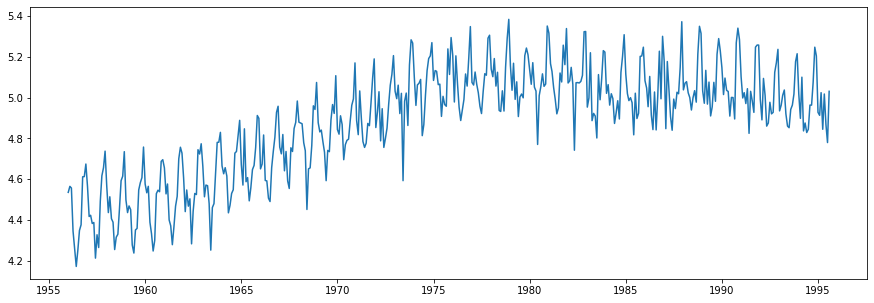

In [8]:
# the data is not stationary
data['log'] = np.log(data['Monthly beer production'])

plt.figure(figsize=(15,5))
plt.plot(data['log'])

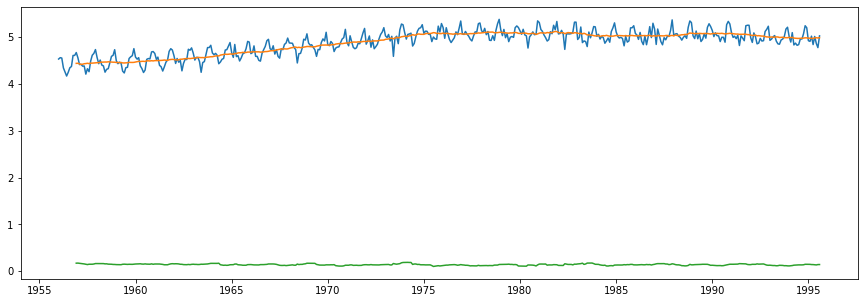

In [9]:
# we can now work with the log of the data

data['logmv'] = data['log'].rolling(window=12).mean()
data['logstd'] = data['log'].rolling(window=12).std()

fig, axis = plt.subplots(figsize=(15,5))

axis.plot(data['log'])
axis.plot(data['logmv'])
axis.plot(data['logstd'])
plt.show()


In [10]:
# get the difference btn the mv and actual values

data['Differences'] = data['log'] - data['logmv']
data['Differences'] = data['Differences'].dropna()

In [11]:
data

,Monthly beer production,Moving Average,Standard deviation,log,logmv,logstd,Differences
Month,,,,,,,
1956-01-01,93.2,NaN,NaN,4.534748,NaN,NaN,NaN
1956-02-01,96.0,NaN,NaN,4.564348,NaN,NaN,NaN
1956-03-01,95.2,NaN,NaN,4.555980,NaN,NaN,NaN
1956-04-01,77.1,NaN,NaN,4.345103,NaN,NaN,NaN
1956-05-01,70.9,NaN,NaN,4.261270,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1995-04-01,127.0,146.166667,21.391729,4.844187,4.975631,0.138506,-0.131444
1995-05-01,151.0,147.833333,20.875533,5.017280,4.987471,0.135173,0.029809
1995-06-01,130.0,148.250000,20.423360,4.867534,4.990739,0.131396,-0.123205


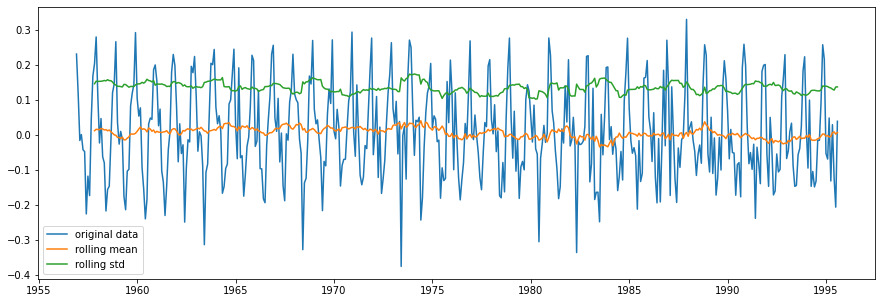

Test statistics                 -3.432559
p-value                          0.009898
lags used                       13.000000
number of observations used    451.000000
critical value 1%               -3.444933
critical value 5%               -2.867970
critical value 10%              -2.570195
dtype: float64


In [12]:
# create a function to test the stationarity of the data

def teststationarity(timeseriesdata, window=12, key='log'):
    rollingmean = timeseriesdata[key].rolling(window=window).mean()
    rollingstd = timeseriesdata[key].rolling(window=window).std()
    
    fig, axis = plt.subplots(figsize=(15,5))
    axis.plot(timeseriesdata[key], label='original data')
    axis.plot(rollingmean, label='rolling mean')
    axis.plot(rollingstd, label='rolling std')
    plt.legend()
    plt.show()
    
    adf = adfuller(data[key].dropna(), autolag='AIC')
    
    output = pd.Series(adf[0:4], index=['Test statistics', 'p-value', 'lags used', 'number of observations used'])
    
    for key, value in adf[4].items():
        output['critical value %s'%key] = value
    print(output)

teststationarity(data, key='Differences')

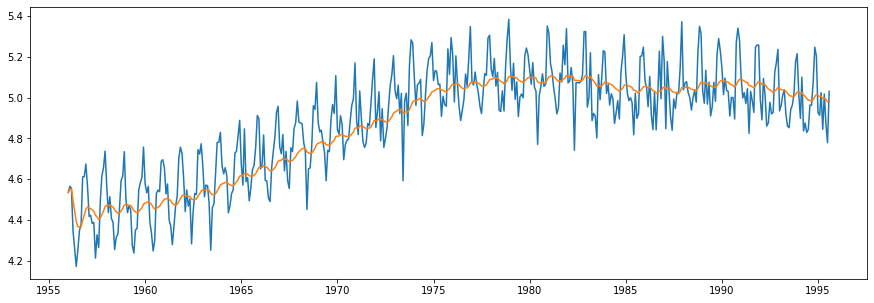

In [13]:
# get the exponential differences

data['exponent'] = data['log'].ewm(halflife=12).mean()
plt.figure(figsize=(15,5))
plt.plot(data['log'])
plt.plot(data['exponent'])

In [14]:
data.head()

,Monthly beer production,Moving Average,Standard deviation,log,logmv,logstd,Differences,exponent
Month,,,,,,,,
1956-01-01,93.2,NaN,NaN,4.534748,NaN,NaN,NaN,4.534748
1956-02-01,96.0,NaN,NaN,4.564348,NaN,NaN,NaN,4.549975
1956-03-01,95.2,NaN,NaN,4.555980,NaN,NaN,NaN,4.552093
1956-04-01,77.1,NaN,NaN,4.345103,NaN,NaN,NaN,4.495780
1956-05-01,70.9,NaN,NaN,4.261270,NaN,NaN,NaN,4.443310


In [15]:
data['average'] = data['log'] - data['exponent']


In [16]:
data.head()

,Monthly beer production,Moving Average,Standard deviation,log,logmv,logstd,Differences,exponent,average
Month,,,,,,,,,
1956-01-01,93.2,NaN,NaN,4.534748,NaN,NaN,NaN,4.534748,0.000000
1956-02-01,96.0,NaN,NaN,4.564348,NaN,NaN,NaN,4.549975,0.014373
1956-03-01,95.2,NaN,NaN,4.555980,NaN,NaN,NaN,4.552093,0.003886
1956-04-01,77.1,NaN,NaN,4.345103,NaN,NaN,NaN,4.495780,-0.150677
1956-05-01,70.9,NaN,NaN,4.261270,NaN,NaN,NaN,4.443310,-0.182039


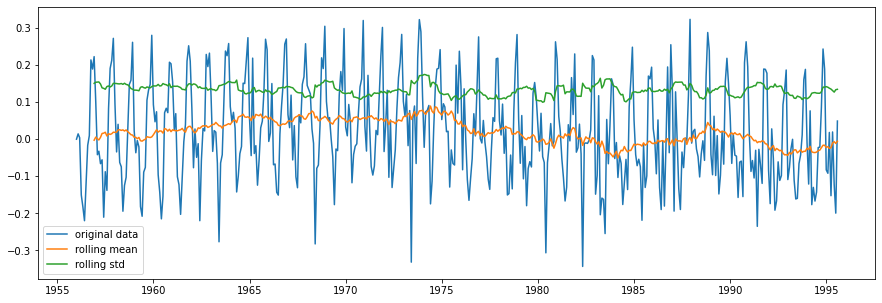

Test statistics                 -1.507616
p-value                          0.529740
lags used                       13.000000
number of observations used    462.000000
critical value 1%               -3.444584
critical value 5%               -2.867816
critical value 10%              -2.570113
dtype: float64


In [17]:
teststationarity(data, key='average')

In [18]:
# we now use the ARIMA model to get the predictions
data['integrated'] = data['log'] - data['log'].shift()

In [19]:
data.head()

,Monthly beer production,Moving Average,Standard deviation,log,logmv,logstd,Differences,exponent,average,integrated
Month,,,,,,,,,,
1956-01-01,93.2,NaN,NaN,4.534748,NaN,NaN,NaN,4.534748,0.000000,NaN
1956-02-01,96.0,NaN,NaN,4.564348,NaN,NaN,NaN,4.549975,0.014373,0.029600
1956-03-01,95.2,NaN,NaN,4.555980,NaN,NaN,NaN,4.552093,0.003886,-0.008368
1956-04-01,77.1,NaN,NaN,4.345103,NaN,NaN,NaN,4.495780,-0.150677,-0.210877
1956-05-01,70.9,NaN,NaN,4.261270,NaN,NaN,NaN,4.443310,-0.182039,-0.083833


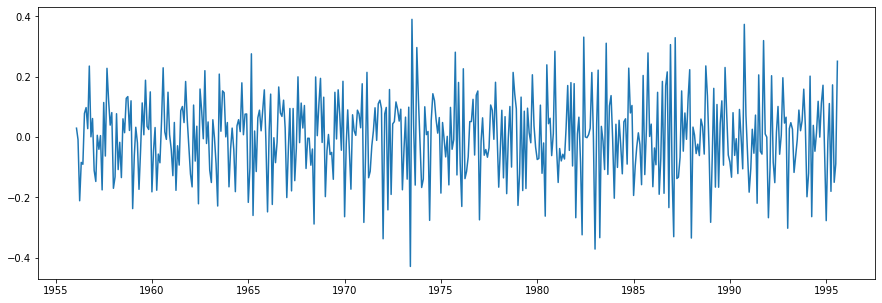

In [20]:
plt.figure(figsize=(15,5))
plt.plot(data['integrated'])
plt.show()

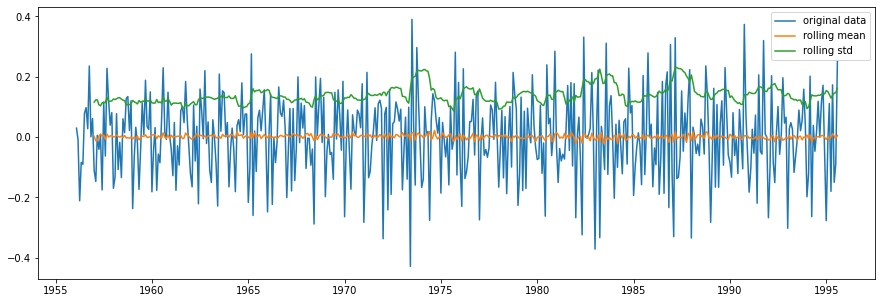

Test statistics                 -4.869646
p-value                          0.000040
lags used                       18.000000
number of observations used    456.000000
critical value 1%               -3.444772
critical value 5%               -2.867899
critical value 10%              -2.570157
dtype: float64


In [21]:
teststationarity(data, key='integrated')

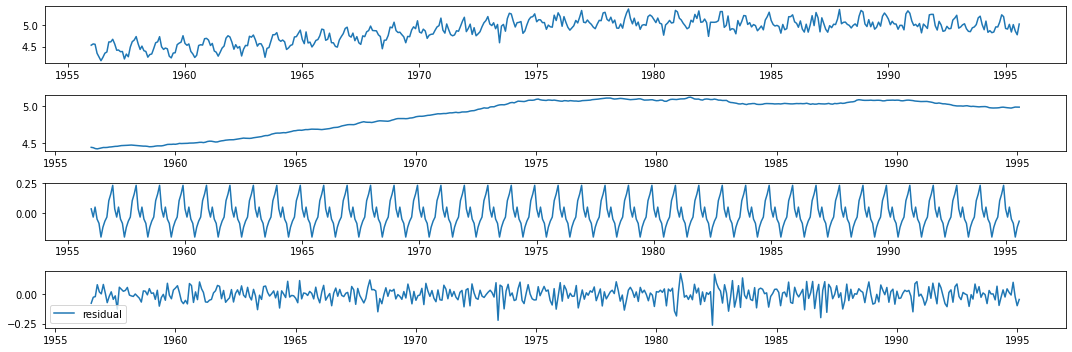

In [22]:
results = seasonal_decompose(data['log'])


trend = results.trend

seasonality = results.seasonal

residual = results.resid

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(15,5))

ax1.plot(data['log'], label='original data')

ax2.plot(trend, label='trend values')

ax3.plot(seasonality, label='seasonality')

ax4.plot(residual, label='residual')

plt.legend()

plt.tight_layout()
plt.show()

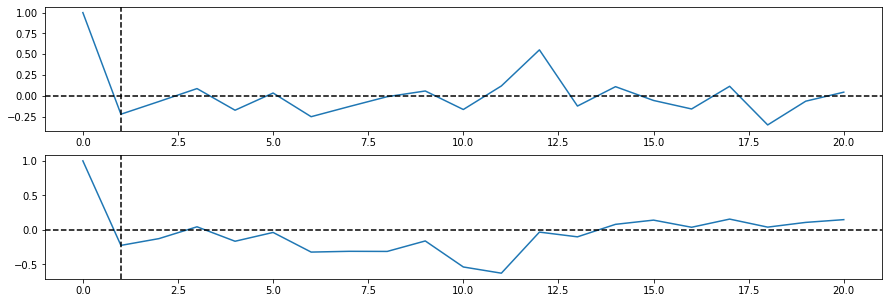

In [24]:
# compute the auto correlation functio
from statsmodels.tsa.stattools import pacf, acf

acfd = acf(data['integrated'].dropna(), nlags=20, fft=False)

pacfd = pacf(data['integrated'].dropna(), nlags=20, method='ols')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,5))

ax1.plot(acfd)
ax1.axhline(0, linestyle='--', color='black')
ax1.axvline(1, linestyle='--', color='black')

ax2.plot(pacfd)
ax2.axhline(0, linestyle='--', color='black')
ax2.axvline(1, linestyle='--', color='black')

plt.show()

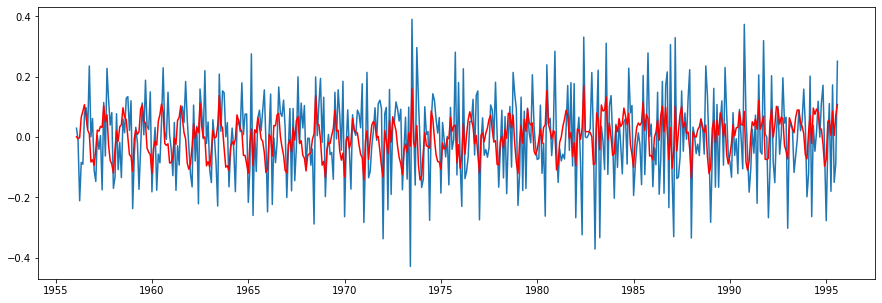

In [23]:
# build model
from statsmodels.tsa.arima_model import ARIMA

model = sm.tsa.ARIMA(data['log'], order=(1,1,1))

res = model.fit(start_ar_lags=1)
plt.figure(figsize=(15,5))
plt.plot(data['integrated'])
plt.plot(res.fittedvalues, color='red')

In [24]:
data.shape

(476, 10)

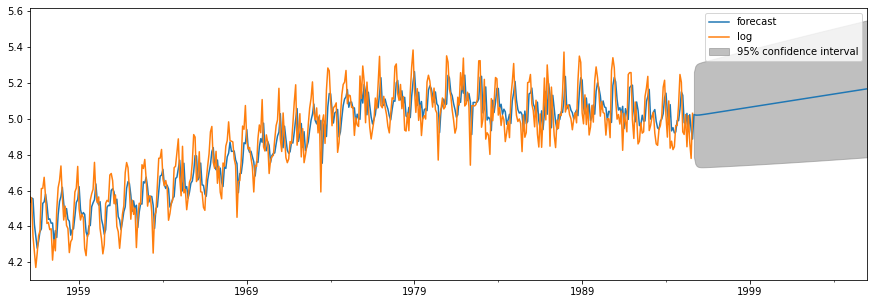

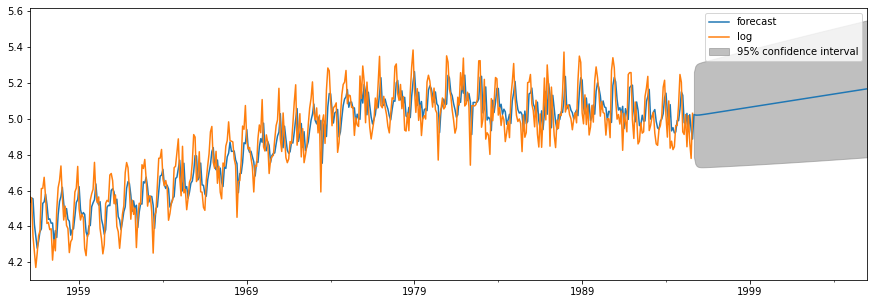

In [25]:
fig, ax =plt.subplots(figsize=(15, 5))
res.plot_predict(1, 600, ax=ax)

In [26]:
data.tail(1)

,Monthly beer production,Moving Average,Standard deviation,log,logmv,logstd,Differences,exponent,average,integrated
Month,,,,,,,,,,
1995-08-01,153.0,148.416667,21.29216,5.030438,4.99095,0.139485,0.039488,4.981513,0.048925,0.251314
